# Cargo librerías



In [37]:
import numpy as np #manejo de arreglos

import matplotlib.pyplot as plt #gráficos

# from sklearn.decomposition import PCA #Componentes principales
from sklearn.preprocessing import StandardScaler #Escalado de datos

from sklearn.linear_model import LogisticRegression #regresión logística

# matriz de confusión: https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# métricas para evaluar la clasificación predicha
from sklearn.metrics import accuracy_score, recall_score, precision_score
# otras métricas se pueden ver acá: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

# más métricas
from sklearn.metrics import f1_score, classification_report, plot_roc_curve

# divide en conjuntos para entrenar y para testeat
from sklearn.model_selection import train_test_split

# Tamaño de gráficos
plt.rcParams["figure.figsize"] = (10,10)

# Levanto datos, separo train/test y estandarizo.

In [ ]:
# El csv está acá: https://www.kaggle.com/ronitf/heart-disease-uci
datos = np.loadtxt('./heart.csv',delimiter=',', skiprows=1)#, usecols = (0,2,3,4,5,6,7,8) )
nombres = ['age','sex','cp','rbs','sc','fbs120','recr','mhr','eia','op','slope','ca','thal']

# extraigo variables (predictoras, features, características, son todos nombres que se usan)
X = datos[:,0:-1]
# extraigo clasificación (target, labels, etiquetas, son todos nombres que se usan)
y = datos[:,-1]

# Separo en train/test. El stratify es para conservar el balance de clases.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)#, random_state=474077)

#IMPORTANTE: sigue estando el problema que el split influye mucho en la predicción. Para resolver, o mejor dicho
# amortiguar este efecto, se hace Cross Validation (Validación Cruzada), que por ahora queda en el tintero.
# La solución de compromiso que usamos es fijar el random_state para hacer comparables las métricas entre diferentes
# experimentos.
# De todos modos, puede pensar por su cuenta alguna estrategia para amortiguar el efecto que vimos de la gran variabilidad
# que tiene la predicción dependiendo del split aleatorio que se use.


# Standarizo datos de ENTRENAMIENTO
scaler = StandardScaler()
scaler.fit(X_train) #calcula promedio y desvío
X_train = scaler.transform(X_train) #estandariza con promedio y desvío anteriores

# Standarizo datos de TESTEO con los mismos promedio y desvío calculados para entrenamiento
X_test = scaler.transform(X_test)
# ¿Por qué hago esto? Porque en teoría los datos de entrenamientos son desconocidos a la hora de entrenar el modelo.

# Entreno modelo predictor y lo evalúo en TEST

In [40]:
lg = LogisticRegression() #instancio la clase
#entreno modelo predictivo a partir de los datos de ENTRENAMIENTO
modelo_lg = lg.fit(X_train, y_train) 
# clasifico según el modelo, es decir predigo las clases, con los datos de TESTEO.
y_pred_test = modelo_lg.predict(X_test) 



# métricas de evaluación sobre los datos de TESTEO.
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
clasif_report = classification_report(y_test, y_pred_test)

print('Métricas sobre datos nuevos de TEST')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))
print('Classification Report:')
print(clasif_report)




# métricas de evaluación, VARIANDO punto de corte, sobre datos de TESTEO.
probas = lg.predict_proba(X_test) #probabilidades de cada clase según modelo predictivo
# inspecciono esas probabilidades
# with np.printoptions(precision=3, suppress=True):
    # print(probas[0:5])

# por ejemplo, por defecto asumo que SÍ tiene riesgo cardíco (y=1)
y_pred_test_custom = np.ones(y_test.shape)

punto_corte = 0.8
#y si la probabilidad de y=0 es mayor a punto_corte, lo clasifico como sin riesgo (y=0)
# del mismo modo puedo variar el punto de corte para la otra clase y=1.
for i in range(probas.shape[0]):
    if (probas[i,0]>punto_corte):
        y_pred_test_custom[i]=0.
# lo anterior se puede hacer más copado con listas por comprensión
# https://realpython.com/list-comprehension-python/
# https://entrenamiento-python-basico.readthedocs.io/es/latest/leccion10/listas_comprension.html


accuracy = accuracy_score(y_test, y_pred_test_custom)
recall = recall_score(y_test, y_pred_test_custom)
precision = precision_score(y_test, y_pred_test_custom)
f1 = f1_score(y_test, y_pred_test_custom)
clasif_report = classification_report(y_test, y_pred_test_custom)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))
print('Classification Report:')
print(clasif_report)


Métricas sobre datos nuevos de TEST
Accuracy:  0.85
Recall:  0.84
Precision:  0.88
F1:  0.86
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        41
         1.0       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91


Métricas sobre datos nuevos de TEST con punto de corte arbitrario
Accuracy:  0.84
Recall:  0.98
Precision:  0.78
F1:  0.87
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78        41
         1.0       0.78      0.98      0.87        50

    accuracy                           0.84        91
   macro avg       0.87      0.82      0.82        91
weighted avg       0.86      0.84      0.83        91



# Evaluación en TEST por Curva ROC

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

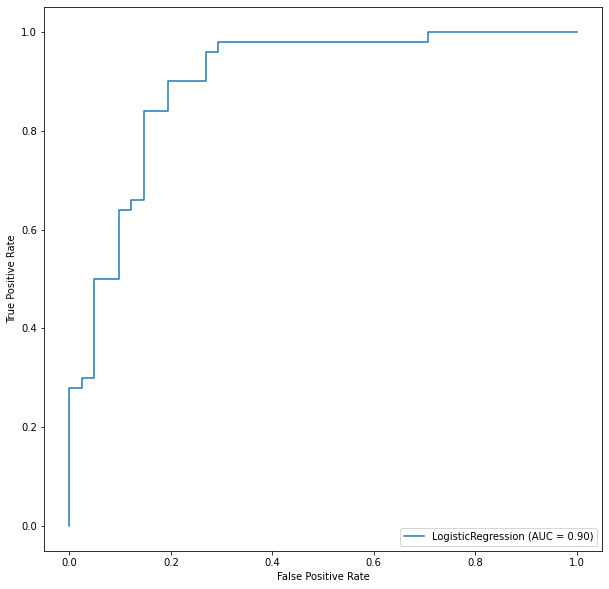

In [39]:
# funciona solamente para clasificación binaria (2 clases)
# para muchas clases se puede ver esto: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
plot_roc_curve(modelo_lg, X_test, y_test)

# Teoría sobre las métricas

# Matriz de confusión:

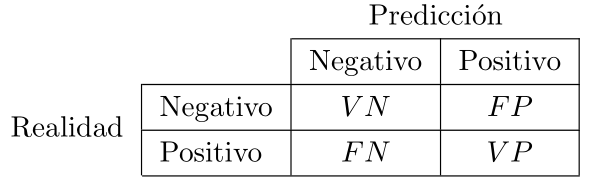

- VP = verdadero positivo
- VN = verdadero negativo
- FP = falso positivo
- FN = falso negativo

# Métricas para evaluar la clasificación:

### Accuracy
$$\text{Accuracy = }\frac{VP+VN}{Total} = \frac{VP+VN}{VP+VN+FP+FN}$$

### Recall
$$\text{Recall = }\frac{VP}{VP+FN}$$

### Precision
$$\text{Precision = }\frac{VP}{VP+FP}$$

### F1-score: media armónica entre Precision (_P_) y Recall (_R_)
$$ \text{F}_1 = \left(\frac{R^{-1}+P^{-1}}{2}\right)^{-1} = 2\frac{R.P}{R+P} = \frac{VP}{VP + \frac{1}{2}(FP+FN)}$$

### True Positive Rate = Recall

### True Negative Rate = Specificity (Especificidad)
$$ \text{TNR = Specificity = } \frac{VN}{VN+FP} $$ 

### False Positive Rate
$$ \text{FPR = } \frac{FP}{FP+VN} = 1 - \text{Specificity} $$

### Curva ROC: gráfico FPR vs. TPR.

### AUC: area under curve (donde curve es la curva ROC).
- Es un promedio de los valores de la curva ROC.

### Papers donde muestran que la AUC es una mucho mejor medida que el accuracy para comparar modelos predictores **en términos generales**.

- https://www.csd.uwo.ca/~xling/papers/ijcai03.pdf
- https://cse.hkust.edu.hk/~qyang/537/Papers/AUC-evaluation.pdf